# Import library

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from keras.layers import Dense, LSTM
from matplotlib.animation import FuncAnimation
from math import sqrt
from sklearn.metrics import mean_squared_error

In [25]:
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
%matplotlib inline

# 1. Read data

In [50]:
VNIndex = pd.read_csv('https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/AppWeb/Data/VNI.csv',
                        parse_dates=['Date'], index_col='Date').filter(['Price'])
VNItest = pd.read_csv('https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/CSVFile/VNItest.csv',
                        parse_dates=['Date'], index_col='Date').filter(['Price'])

VNIndex["Price"] = pd.to_numeric(VNIndex["Price"].apply(lambda x: x.replace(",", "")))
VNItest["Price"] = VNItest["Price"].str.replace(',', '').astype(float)

VNIndex = VNIndex.iloc[::-1]
VNItest = VNItest.iloc[::-1]

# 2. Visualize

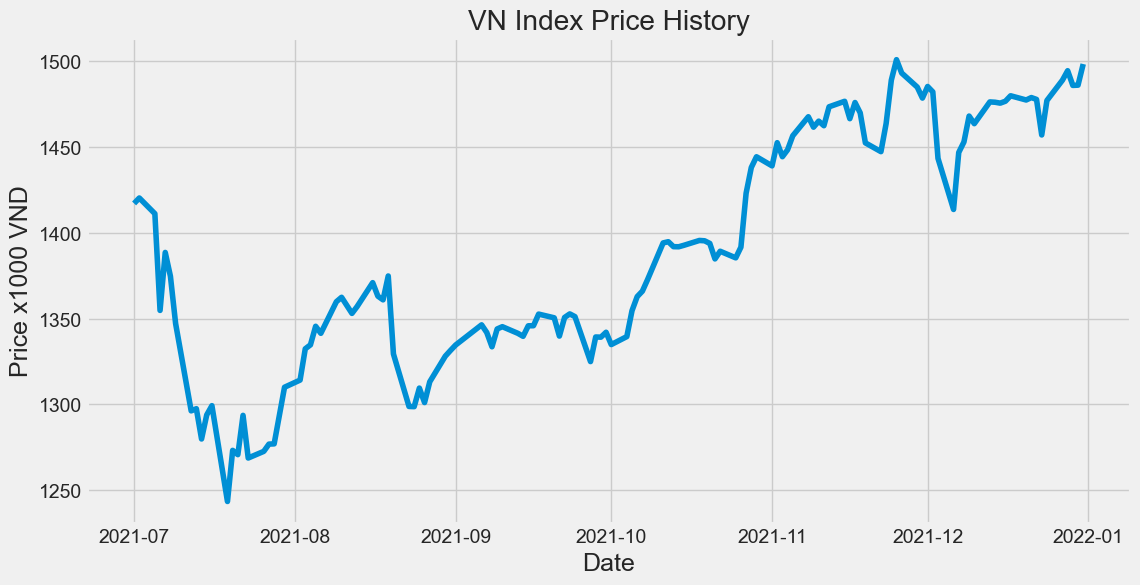

In [27]:
plt.figure(figsize=(12,6))
plt.title('VN Index Price History')
plt.plot(VNIndex['Price'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price x1000 VND', fontsize=18)
plt.show()

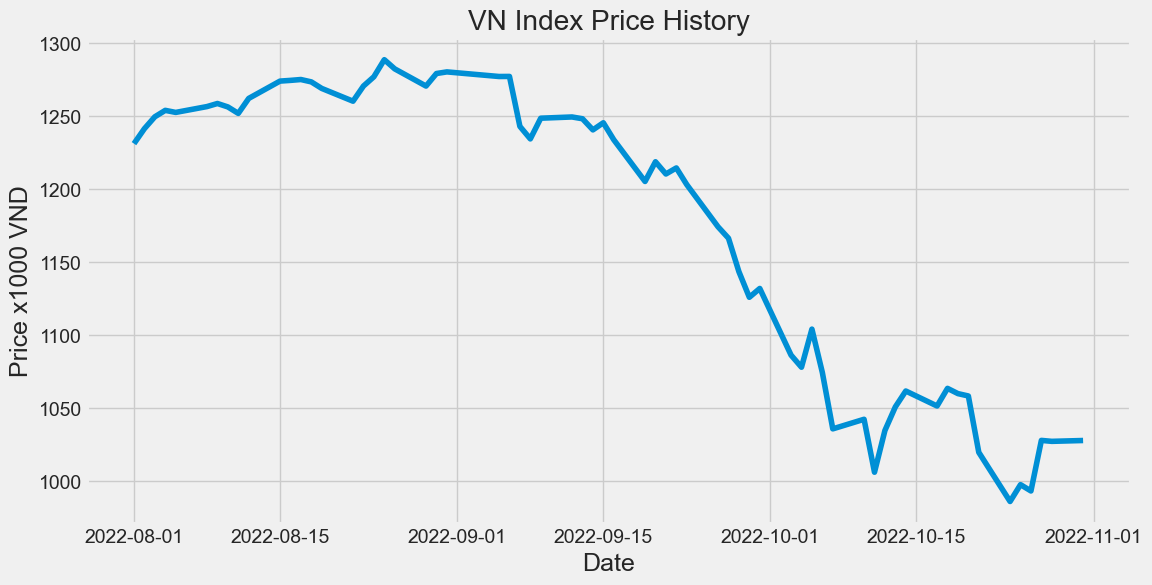

In [51]:
plt.figure(figsize=(12,6))
plt.title('VN Index Price History')
plt.plot(VNItest['Price'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price x1000 VND', fontsize=18)
plt.show()

# 3. Preprocess data

In [54]:
training_data_len = int(np.ceil(len(VNIndex)))
training_data_len

130

In [55]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(VNIndex)
# scaled_data

In [56]:
time_step = 5

In [57]:
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(time_step, len(train_data)):
    x_train.append(train_data[i-time_step:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(125, 5, 1)

# 4. Build model

In [58]:
from datetime import datetime

In [59]:
from statsmodels.tsa.arima.model import ARIMA
X = VNIndex.values
X
train = X[:training_data_len]
train

array([[1417.08],
       [1420.27],
       [1411.13],
       [1354.79],
       [1388.55],
       [1374.68],
       [1347.14],
       [1296.3 ],
       [1297.54],
       [1279.91],
       [1293.92],
       [1299.31],
       [1243.51],
       [1273.29],
       [1270.79],
       [1293.67],
       [1268.83],
       [1272.71],
       [1276.93],
       [1277.07],
       [1293.6 ],
       [1310.05],
       [1314.22],
       [1332.44],
       [1334.74],
       [1345.55],
       [1341.45],
       [1359.86],
       [1362.43],
       [1357.79],
       [1353.05],
       [1357.05],
       [1370.96],
       [1363.09],
       [1360.94],
       [1374.85],
       [1329.43],
       [1298.86],
       [1298.74],
       [1309.55],
       [1301.12],
       [1313.2 ],
       [1328.14],
       [1331.47],
       [1334.65],
       [1346.39],
       [1341.9 ],
       [1333.61],
       [1343.98],
       [1345.31],
       [1341.43],
       [1339.7 ],
       [1345.83],
       [1345.87],
       [1352.64],
       [13

In [60]:
test = VNItest.values
test

array([[1231.35],
       [1241.62],
       [1249.76],
       [1254.15],
       [1252.74],
       [1256.75],
       [1258.85],
       [1256.5 ],
       [1252.07],
       [1262.33],
       [1274.2 ],
       [1274.69],
       [1275.28],
       [1273.66],
       [1269.18],
       [1260.43],
       [1270.81],
       [1277.16],
       [1288.88],
       [1282.57],
       [1270.8 ],
       [1279.39],
       [1280.51],
       [1277.35],
       [1277.4 ],
       [1243.17],
       [1234.6 ],
       [1248.78],
       [1249.62],
       [1248.4 ],
       [1240.77],
       [1245.66],
       [1234.03],
       [1205.43],
       [1218.93],
       [1210.55],
       [1214.7 ],
       [1203.28],
       [1174.35],
       [1166.54],
       [1143.62],
       [1126.07],
       [1132.11],
       [1086.44],
       [1078.14],
       [1104.26],
       [1074.52],
       [1035.91],
       [1042.48],
       [1006.2 ],
       [1034.81],
       [1050.99],
       [1061.85],
       [1051.58],
       [1063.66],
       [10

In [61]:
start = datetime.now()
history = [x for x in train]
predictions = list()

for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
end = datetime.now()


In [62]:
print("Run time for ARIMA model: ", end - start)
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE - ARIMA: %.3f' % rmse)

Run time for ARIMA model:  0:00:05.931339
Test RMSE - ARIMA: 38.035


In [64]:
history = [x for x in train]
predictions = list()

for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)

In [65]:
## ARIMA MODEL
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE - ARIMA: %.3f' % rmse)

Test RMSE - ARIMA: 38.035


In [68]:
VNI_valid = VNItest
VNI_valid['Predictions'] = predictions

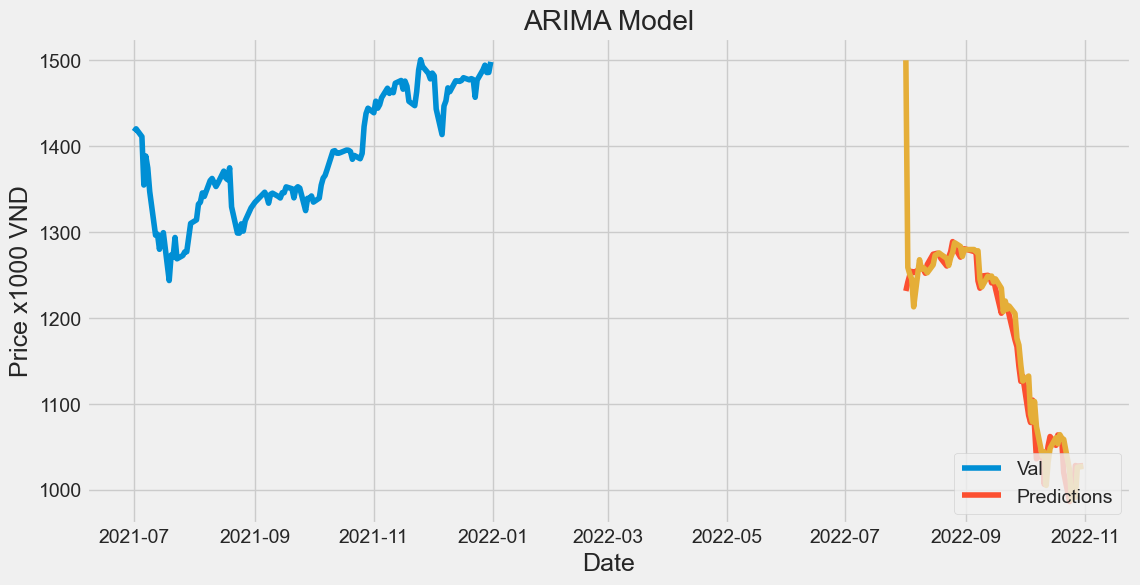

In [69]:
plt.figure(figsize=(12,6))
plt.title('ARIMA Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price x1000 VND', fontsize=18)
plt.plot(VNIndex['Price'])
plt.plot(VNI_valid[['Price', 'Predictions']])
plt.legend(['Val', 'Predictions'], loc='lower right')
plt.show()